# **Predict weight from height - Linear Regression**

## **1. General**
* Goal: 
  * Build a simple linear regression model to predict weight $(y)$ from height $(x)$.
  * Compare the solution calculated by **Normal Equation** and optimized by **Gradient Descent**.
  * Evaluate the quality by $MSE$ and $R^2$.
* Dataset: 20 lines of data generated by my own **(Data is for learning only)**

## **2. Import and environment**

In [216]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
np.random.seed(42)

## **3. Data loading and quick glance**

In [217]:
df

,height,weight
0,147.0,49.0
1,148.1,49.5
2,150.0,50.0
3,152.5,50.8
4,153.0,51.0
5,155.0,52.0
6,158.0,54.0
7,160.0,56.0
8,161.0,56.5
9,163.0,58.0


In [218]:
df = pd.read_csv('data.csv') 
df.head()
df.describe()

,height,weight
count,20.000000,20.000000
mean,164.395000,58.640000
std,11.557248,7.148529
min,147.000000,49.000000
25%,154.500000,51.750000
50%,164.000000,58.500000
75%,173.500000,64.500000
max,183.000000,72.000000


## **4. EDA - scatter + correlation**

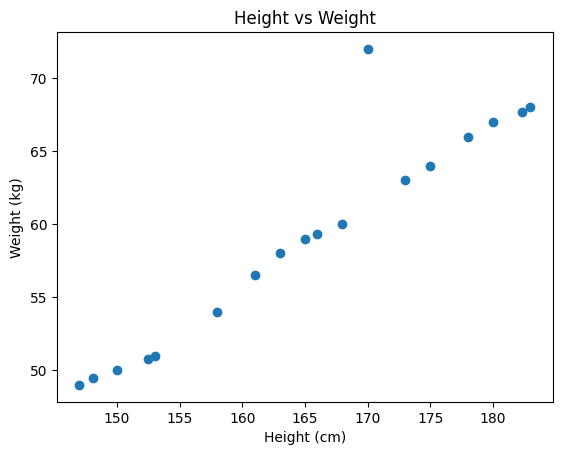

Correlation: 0.9370879201386699


In [219]:
test_df = df[df['height'].isin([155, 160])]
train_df = df[~df['height'].isin([155, 160])]

X = train_df['height'].values
Y = train_df['weight'].values

plt.scatter(X, Y)
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.title('Height vs Weight')
plt.show()

print('Correlation:', np.corrcoef(X, Y)[0,1])
# If correlation is near 1, linear regression is appropriate


## **5. Why Linear Regression ?**
* When the relationship between height $(x)$ and weight $(y)$ is approximately linear, **linear regression** is a simple, easy-to-understand model.
* **Advantages:** Easy to interpret coefficients, fast, doest not over-fit too much if the data is small.
* **Disadvantages:** Not suitable if the relationship is strongly nonlinear.

### **5.1. What is "Linear" ?**
In mathematics and machine learning, **linear** refers to a relationship that can be expressed (or approximated) as a straight line.  

#### **5.1. Simple intuition**
- A **linear relationship** means that when the input variable $x$ changes, the output variable $y$ changes in a **constant rate**.
- Example: 
  $$
  y = 1 + 2x
  $$
  - If $x$ increases by 1, $y$ always increases by 2.  
  - The graph of this function is a straight line.

#### **5.2. In statistics & regression**
- When we say two variables are **linearly related**, we mean that the relationship between them can be described (approximately) by:
$$
y \approx \theta_0 + \theta_1 x
$$
- For example: height $(x)$ and weight $(y)$ usually have a positive linear relationship: taller people tend to weigh more, roughly along a straight line.

#### **5.3. Mathematical meaning**
- A function is linear if it satisfies:
$$
f(a x_1 + b x_2) = a f(x_1) + b f(x_2)
$$
- In machine learning, however, “linear” often means the model is of the form:
$$
y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \cdots + \theta_n x_n
$$
which corresponds to a straight line (1D), a plane (2D), or a hyperplane (higher dimensions).

#### **5.4. Linear vs. Non-linear**
- **Linear:** $y = 2 + 3x$ → straight line.  
- **Non-linear:** $y = x^2, y = \sin(x)$ → curves, not straight lines.  


## **6. Model and short equation**

Model: 
$$
\hat{y} = \theta_0 + \theta_1 x
$$

### **6.1. Why do we need a loss function?**
- In linear regression, we want the predicted value $\hat{y}$ to be **as close as possible** to the actual value $y$.  
- To measure **how far** predictions are from real data, we define a **loss function** (also called cost function).  
- A popular choice is **Mean Squared Error (MSE)**:
$$
J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m \big(\hat{y}^{(i)} - y^{(i)}\big)^2
= \frac{1}{2m}\sum_{i=1}^m (\theta_0 + \theta_1 x^{(i)} - y^{(i)})^2
$$

### **6.2. Why squared error?**
- Squaring ensures all errors are **positive** (avoid cancellation between positive/negative errors).  
- Squaring also **penalizes larger errors more strongly**, making the model fit better to outliers.

### **6.3. How to minimize the loss?**
Our goal is:
$$
\min_{\theta_0,\theta_1} J(\theta_0, \theta_1)
$$

There are two approaches:

1. **Normal Equation**  
   - Take the derivative of $J(\theta)$ with respect to $\theta$, set it to zero.  
   - This gives a closed-form solution:
   $$
   \theta = (X^\top X)^{-1} X^\top y
   $$
   - Best when the number of features $d$ is small to medium.

2. **Gradient Descent**  
   - Iteratively update parameters in the direction opposite to the gradient:  
   $$
   \theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
   $$
   - Useful when $d$ is very large (normal equation becomes expensive).

These above formula will be proven in section **9. Appendix - Derivation Normal Equation**

## **7. Implementation**

### **7a. Normal equation**

In [220]:
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

ones = np.ones(X.shape)
XBar = np.concatenate((ones, X), axis=1)

theta_ne = np.linalg.pinv(XBar.T @ XBar) @ XBar.T @ Y   # @ is matrix multiply

# or using np.matmul(matrixA, matrix B)
# theta_ne = np.linalg.pinv(np.matmul(XBar.T, XBar))
# theta_ne = np.matmul(theta_ne, np.matmul(XBar.T, Y))

print(f"Theta (Normal equation):{theta_ne.ravel()}")
mse_ne = compute_loss(XBar, Y, theta_ne)
print("MSE (Normal Equation):", mse_ne)

Theta (Normal equation):[-36.02308668   0.57627756]
MSE (Normal Equation): 3.097719203116643


### **7b. Gradient Descent (vectorized)**

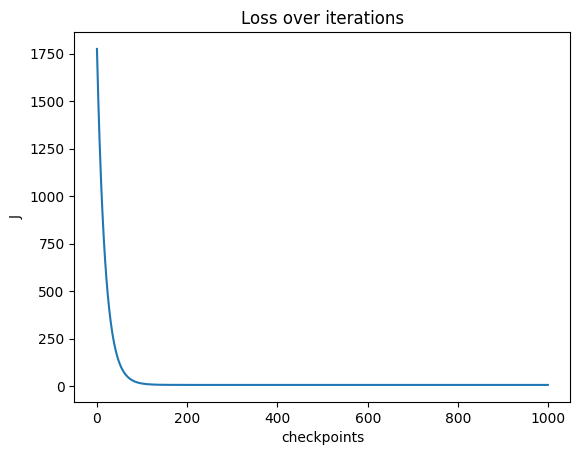

Theta (Gradient Descent): [0.00198768 0.35922635]
MSE (Gradient Descent): 6.279829049627901


In [221]:
def compute_loss(X, Y, theta):
    m = len(Y)
    preds = X @ theta
    return (1/(2*m)) * np.sum((preds - Y)**2)

def gradient_descent(X, Y, theta0, alpha=1e-7, iters=2000, log_every=100):
    m = len(Y)
    theta = theta0.copy()
    J_hist = []
    for i in range(iters):
        grad = (1/m) * (X.T @ (X @ theta - Y))   # shape (2,1)
        theta = theta - alpha * grad
        if i % log_every == 0:
            J_hist.append(compute_loss(X, Y, theta))
    return theta, J_hist

theta0 = np.zeros((2, 1))
theta_gd, J_hist = gradient_descent(XBar, Y, theta0, alpha=1e-8, iters=100000, log_every=100)
plt.plot(np.linspace(0, len(J_hist)-1, len(J_hist)), J_hist)
plt.title('Loss over iterations')
plt.xlabel('checkpoints')
plt.ylabel('J')
plt.show()

print("Theta (Gradient Descent):", theta_gd.ravel())
mse_gd = compute_loss(XBar, Y, theta_gd)
print("MSE (Gradient Descent):", mse_gd)


### **7c. Scikit-learn**

In [222]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
print("Theta:", model.intercept_[0], model.coef_[0][0])

y_pred = model.predict(X)
mse_sklearn = mean_squared_error(Y, y_pred) / 2
print("MSE (sklearn):", mse_sklearn)


Theta: -36.023086681013524 0.5762775607178995
MSE (sklearn): 3.097719203116645


In [223]:
print(f"Normal Equation -> Theta: {theta_ne.ravel()}, MSE: {mse_ne}\n")
print(f"Gradient Descent -> Theta: {theta_gd.ravel()}, MSE: {mse_gd}\n")
print(f"Scikit-learn -> Theta: {model.intercept_[0]} {model.coef_[0][0]}, MSE: {mse_sklearn}")


Normal Equation -> Theta: [-36.02308668   0.57627756], MSE: 3.097719203116643

Gradient Descent -> Theta: [0.00198768 0.35922635], MSE: 6.279829049627901

Scikit-learn -> Theta: -36.023086681013524 0.5762775607178995, MSE: 3.097719203116645


## **8. Evaluation**

## **9. Appendix — Derivation Normal Equation**

## **10. Conclusion**